In [9]:
import numpy as np
import parameters
from parameters import *

G = parameters.G_local

In [10]:
def initial_position(planet, direction1 = np.array([1,0])):
    direction1 = np.asarray(direction1)
    return np.array([direction1*i for i in (planet['semi-major']*(1+planet['eccentricity']))])

In [11]:
def initial_velocity(star, planet, direction=np.array([0,-1])):
    direction = np.asarray(direction)
    return np.array([direction*v for v in np.sqrt(G*star['mass']*(1 - planet['eccentricity']) / (planets['semi-major'] * (1 + planet['eccentricity'])))])

In [12]:
def F_gravity_single(r, m, M=star['mass']):
    """Force for one planet at position r with mass m"""
    rr = np.sum(r*r)
    rhat = r/np.sqrt(rr)
    return (-G*M*m / rr) * rhat

In [13]:
def F_planet(positions):
    
    planetA = positions[0]
    
    
    F_on_planetA = F_gravity(planetA, planet['mass'], star['mass']) + F_UN
    return np.array([F_on_planetA])

In [14]:
def planetary_orbit(dt=0.01, t_max=1):
    nsteps = int(t_max/dt)
    time = dt * np.arange(nsteps)

    # shape = (step, planet, x/y)
    r = np.zeros((len(time), 6, 2))
    v = np.zeros_like(r)

    #initial_poition(planets)

    r[0, :, :] = initial_position(planet)
    v[0, :, :] = initial_velocity(star, planet)
   
    masses = np.array(planet['mass'])

    # start force evaluation for first step
    Ft = F_planets_decoupled(r[0], planet['mass'])
    for i in range(nsteps-1):
        vhalf = v[i] + 0.5*dt * Ft/planet['mass'][:, np.newaxis]
        r[i+1, :] = r[i] + dt * vhalf
        Ftdt = F_planets_decoupled(r[i+1], planet['mass'])
        v[i+1, :] = vhalf + 0.5*dt * Ftdt/planet['mass'][:, np.newaxis]
        # new force becomes old force
        Ft = Ftdt
    return time, r, v

In [15]:
r

NameError: name 'r' is not defined

In [16]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

planetA = r[:,0]

# plot orbits

ax = plt.subplot()
ax.plot(planetB[:,0], planetB[:, 1], label="TRAPPIST-1b")
ax.plot([0] ,[0], marker='o', markersize=3, color="red")
ax.annotate('TRAPPIST-1', xy=(2, 1), xytext=(10, 10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.title('TRAPPIST-1 Orbital System')
plt.ylabel('Y Axis')
plt.xlabel('X Axis')
plt.legend(fontsize = 'xx-small')

NameError: name 'r' is not defined

In [17]:
def flux_deficit(R_pl = 0.1, R = 1.):
    x = np.arange(0.,1.,0.1)
    mu = (1. - x)**0.5
    flux_deficit = ((mu + (2/3))*R_pl**2)/((4/3)*R**2)
    return flux_deficit

In [18]:
 """Transit time"""
p = 385827.84 # orbital period in seconds
b = 0.15 # impact parameter
a = 7829770 # semi-major axis in Au is 0.0533, value used given in km
R = np.arange(0., 1.,0.1)
R_pl = 0.1

T_duration = (p/(np.pi))*np.arcsin((((R + R_pl)**2 - (b*R)**2)**0.5)/a)

In [19]:
"""Luminosity calculation"""
x = np.arange(0.,1.,0.1)
Rx = np.arange(0., 1.0, 0.1)
M_wasp55 = 1.0
rho = M_wasp55/((4.0/3.0)*(np.pi)*(Rx)**3)
sigma = 5.6704e-05 # in cgs
T_eff = 6000 # in Kelvins
L = ((4*np.pi)*Rx**2)*sigma*(0.75*(T_eff**4)*(rho*x + (2/3)))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in multiply


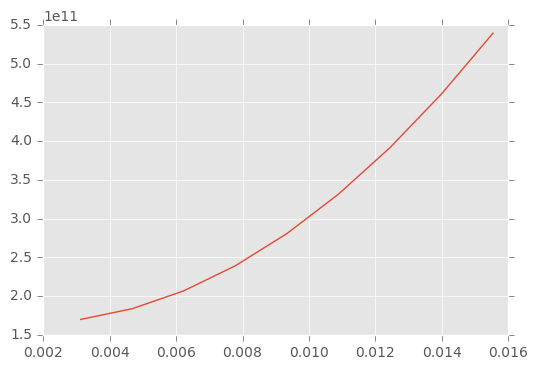

In [20]:
import matplotlib.pyplot as plt

plt.plot(T_duration, L)
plt.show()